In [31]:
import cv2
import numpy as np
import os 
import subprocess
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [80]:
def extract_frames_from_video(video_path, size = 256):
    """
    Extracts frames from a video.

    :param video_path: Path to the video file.
    :return: List of frames as numpy arrays.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video {video_path}")

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame / 256.0)
    cap.release()
    return frames

def get_clips(frames_list, sequence_size, stride=10):
    """
    Splits the list of frames into clips of a fixed size with a given stride.

    :param frames_list: List of frames.
    :param sequence_size: The number of frames in each clip.
    :param stride: The step size between the start of each clip.
    :return: List of clips.
    """
    clips = []
    for i in range(0, len(frames_list) - sequence_size + 1, stride):
        clip = np.array(frames_list[i:i + sequence_size])  # Creating a clip
        clip = np.expand_dims(clip, axis=-1)  # Adding the channel dimension
        clips.append(clip)
    return clips

def get_training_set_from_video(video_path, sequence_size=20):
    frames = extract_frames_from_video(video_path)
    return np.array(get_clips(frames, sequence_size))

def visualize_frames(training_data, num_sequences=1, num_frames=10):
    """
    Visualizes frames from the training data.

    :param training_data: The training data containing sequences of frames.
    :param num_sequences: Number of sequences to visualize.
    :param num_frames: Number of frames to visualize per sequence.
    """
    for sequence in range(min(num_sequences, len(training_data))):
        fig, axs = plt.subplots(1, num_frames, figsize=(20, 2))
        for frame in range(num_frames):
            axs[frame].imshow(training_data[sequence][frame, :, :, 0], cmap='gray')
            axs[frame].axis('off')
        plt.show()
        
def visualize_as_video(training_data, sequence_idx=0, delay=30):
    """
    Visualizes a sequence of frames as a video.

    :param training_data: The training data containing sequences of frames.
    :param sequence_idx: Index of the sequence to visualize.
    :param delay: Delay between frames in milliseconds.
    """
    sequence = training_data[sequence_idx]
    for frame in sequence:
        frame_display = frame[:, :, 0] 
        cv2.imshow('Frame', frame_display)
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()


In [79]:
video_path = '/Users/idotzhori/Desktop/Highlight Detection/labeled_videos/1/BrentfordvNottinghamForest_scene_13.mp4'  # Replace with the path to your video file
training_data = get_training_set_from_video(video_path)
print(training_data.shape)

(89, 20, 256, 256, 1)


In [46]:
file_names = os.listdir('/Users/idotzhori/Desktop/Highlight Detection/labeled_videos/1')

In [76]:
len(training_data)

45

In [77]:
for i in range(len(training_data)):
    visualize_as_video(training_data, sequence_idx=i, delay=30)

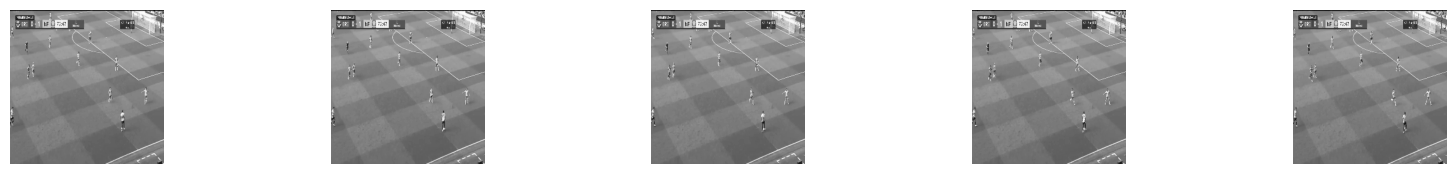

In [56]:
visualize_frames(training_data, num_sequences=1, num_frames=5)

In [66]:
training_data.shape

(45, 20, 256, 256, 1)

In [64]:
visualize_as_video(training_data, sequence_idx=2, delay=30)

In [58]:
source_directory = '/Users/idotzhori/Desktop/Highlight Detection/labeled_videos/1'

processed_clips_directory = '/Users/idotzhori/Desktop/Highlight Detection/processed_clips'
os.makedirs(processed_clips_directory, exist_ok=True)

file_names = os.listdir(source_directory)

for file_name in tqdm(file_names):
    video_path = os.path.join(source_directory, file_name)
    clip_data = get_training_set_from_video(video_path)
#     print(clip_data.shape)
    processed_clip_path = os.path.join(processed_clips_directory, f'{file_name}.pkl')

    with open(processed_clip_path, 'wb') as f:
        pickle.dump(clip_data, f)

100%|█████████████████████████████████████████| 131/131 [01:17<00:00,  1.68it/s]
